# Set up

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
# Check python version and ensure it is <3.8
!python --version

Python 3.7.15


In [ ]:
# Install snscrape
# https://github.com/tobe93gf/snscrape
!pip3 install git+https://github.com/tobe93gf/snscrape.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tobe93gf/snscrape.git to /tmp/pip-req-build-qai_q2l4
  Running command git clone -q https://github.com/tobe93gf/snscrape.git /tmp/pip-req-build-qai_q2l4


In [ ]:
# Install emot
!pip3 install emot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Install textblob
!pip3 install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Install pycaret
!pip3 install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Restart runtime for pycaret
import os
os.kill(os.getpid(), 9)

In [ ]:
# Libraries needed
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import string
import re
import textblob
from textblob import TextBlob
import itertools
from datetime import datetime, timedelta

from pycaret.regression import *

import warnings
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Data Scraping



*   Data from 30 Sep 2016 to 30 Sep 2022
*   Scrapped tweets mentioning 10 companies and storing to CSV for later retrieval
*   Limit to most recent 1000 engligh tweets per day






In [ ]:
# Define function
def scrape(companyQuery, startDate, endDate):

  tweets = []
  numDays = (datetime.strptime(endDate, "%Y-%m-%d") - datetime.strptime(startDate, "%Y-%m-%d")).days + 1 # Including start date
  
  for i in range(numDays):

    # Specify query
    if i == 0:
      nextDate = datetime.strftime(datetime.strptime(startDate, "%Y-%m-%d") + timedelta(days=1), "%Y-%m-%d")
      query = companyQuery + " since:" + startDate + " until:" + nextDate
    else:
      prevDate = nextDate
      nextDate = datetime.strftime(datetime.strptime(prevDate, "%Y-%m-%d") + timedelta(days=1), "%Y-%m-%d")
      query = companyQuery + " since:" + prevDate + " until:" + nextDate

    # Get 1000 most recent query for each day
    dayLimit = 0
    try:
      for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):

        # Get english tweets only
        if tweet.lang == "en":
          dayLimit += 1
          tweets.append([tweet.url, tweet.date, tweet.id, tweet.lang, tweet.content, tweet.likeCount, tweet.retweetCount, tweet.quotedTweet, tweet.quoteCount, tweet.user, tweet.user.friendsCount, tweet.user.followersCount, tweet.user.statusesCount])
          
          # Check limit
          if dayLimit > 1000:
            break
    except:
      pass
          
  # Create df
  df = pd.DataFrame(tweets, columns = ['Url', 'Date', 'ID', 'Lang', 'Content', 'likeCount', 'retweetCount', 'quotedTweet', 'quoteCount', 'User', 'User_friendsCount', 'User_followersCount', 'User_statusesCount'])
  return df

In [ ]:
# Apple
scrape("#Apple OR #AAPL", "2016-09-30", "2017-09-30").to_csv('/content/drive/My Drive/BT4222/Apple2017.csv', index=False)
scrape("#Apple OR #AAPL", "2017-10-01", "2018-09-30").to_csv('/content/drive/My Drive/BT4222/Apple2018.csv', index=False)
scrape("#Apple OR #AAPL", "2018-10-01", "2019-09-30").to_csv('/content/drive/My Drive/BT4222/Apple2019.csv', index=False)
scrape("#Apple OR #AAPL", "2019-10-01", "2020-09-30").to_csv('/content/drive/My Drive/BT4222/Apple2020.csv', index=False)
scrape("#Apple OR #AAPL", "2020-10-01", "2021-09-30").to_csv('/content/drive/My Drive/BT4222/Apple2021.csv', index=False)
scrape("#Apple OR #AAPL", "2021-10-01", "2022-09-30").to_csv('/content/drive/My Drive/BT4222/Apple2022.csv', index=False)

In [ ]:
# Microsoft
scrape("#Microsoft OR #MSFT", "2016-09-30", "2017-09-30").to_csv('/content/drive/My Drive/BT4222/Microsoft2017.csv', index=False)
scrape("#Microsoft OR #MSFT", "2017-10-01", "2018-09-30").to_csv('/content/drive/My Drive/BT4222/Microsoft2018.csv', index=False)
scrape("#Microsoft OR #MSFT", "2018-10-01", "2019-09-30").to_csv('/content/drive/My Drive/BT4222/Microsoft2019.csv', index=False)
scrape("#Microsoft OR #MSFT", "2019-10-01", "2020-09-30").to_csv('/content/drive/My Drive/BT4222/Microsoft2020.csv', index=False)
scrape("#Microsoft OR #MSFT", "2020-10-01", "2021-09-30").to_csv('/content/drive/My Drive/BT4222/Microsoft2021.csv', index=False)
scrape("#Microsoft OR #MSFT", "2021-10-01", "2022-09-30").to_csv('/content/drive/My Drive/BT4222/Microsoft2022.csv', index=False)

In [ ]:
# Google
scrape("#Google OR #GOOG OR #GOOGL", "2016-09-30", "2017-09-30").to_csv('/content/drive/My Drive/BT4222/Google2017.csv', index=False)
scrape("#Google OR #GOOG OR #GOOGL", "2017-10-01", "2018-09-30").to_csv('/content/drive/My Drive/BT4222/Google2018.csv', index=False)
scrape("#Google OR #GOOG OR #GOOGL", "2018-10-01", "2019-09-30").to_csv('/content/drive/My Drive/BT4222/Google2019.csv', index=False)
scrape("#Google OR #GOOG OR #GOOGL", "2019-10-01", "2020-09-30").to_csv('/content/drive/My Drive/BT4222/Google2020.csv', index=False)
scrape("#Google OR #GOOG OR #GOOGL", "2020-10-01", "2021-09-30").to_csv('/content/drive/My Drive/BT4222/Google2021.csv', index=False)
scrape("#Google OR #GOOG OR #GOOGL", "2021-10-01", "2022-09-30").to_csv('/content/drive/My Drive/BT4222/Google2022.csv', index=False)

In [ ]:
# Amazon
scrape("#Amazon OR #AMZN", "2016-09-30", "2017-09-30").to_csv('/content/drive/My Drive/BT4222/Amazon2017.csv', index=False)
scrape("#Amazon OR #AMZN", "2017-10-01", "2018-09-30").to_csv('/content/drive/My Drive/BT4222/Amazon2018.csv', index=False)
scrape("#Amazon OR #AMZN", "2018-10-01", "2019-09-30").to_csv('/content/drive/My Drive/BT4222/Amazon2019.csv', index=False)
scrape("#Amazon OR #AMZN", "2019-10-01", "2020-09-30").to_csv('/content/drive/My Drive/BT4222/Amazon2020.csv', index=False)
scrape("#Amazon OR #AMZN", "2020-10-01", "2021-09-30").to_csv('/content/drive/My Drive/BT4222/Amazon2021.csv', index=False)
scrape("#Amazon OR #AMZN", "2021-10-01", "2022-09-30").to_csv('/content/drive/My Drive/BT4222/Amazon2022.csv', index=False)

In [ ]:
# Tesla
scrape("#Tesla OR #TSLA", "2016-09-30", "2017-09-30").to_csv('/content/drive/My Drive/BT4222/Tesla2017.csv', index=False)
scrape("#Tesla OR #TSLA", "2017-10-01", "2018-09-30").to_csv('/content/drive/My Drive/BT4222/Tesla2018.csv', index=False)
scrape("#Tesla OR #TSLA", "2018-10-01", "2019-09-30").to_csv('/content/drive/My Drive/BT4222/Tesla2019.csv', index=False)
scrape("#Tesla OR #TSLA", "2019-10-01", "2020-09-30").to_csv('/content/drive/My Drive/BT4222/Tesla2020.csv', index=False)
scrape("#Tesla OR #TSLA", "2020-10-01", "2021-09-30").to_csv('/content/drive/My Drive/BT4222/Tesla2021.csv', index=False)
scrape("#Tesla OR #TSLA", "2021-10-01", "2022-09-30").to_csv('/content/drive/My Drive/BT4222/Tesla2022.csv', index=False)

In [ ]:
# Meta
scrape("#Facebook OR #FB", "2016-09-30", "2017-09-30").to_csv('/content/drive/My Drive/BT4222/Facebook2017.csv', index=False)
scrape("#Facebook OR #FB", "2017-10-01", "2018-09-30").to_csv('/content/drive/My Drive/BT4222/Facebook2018.csv', index=False)
scrape("#Facebook OR #FB", "2018-10-01", "2019-09-30").to_csv('/content/drive/My Drive/BT4222/Facebook2019.csv', index=False)
scrape("#Facebook OR #FB", "2019-10-01", "2020-09-30").to_csv('/content/drive/My Drive/BT4222/Facebook2020.csv', index=False)
scrape("#Facebook OR #FB", "2020-10-01", "2021-09-30").to_csv('/content/drive/My Drive/BT4222/Facebook2021.csv', index=False)
scrape("#Facebook OR #FB", "2021-10-01", "2022-09-30").to_csv('/content/drive/My Drive/BT4222/Facebook2022.csv', index=False)

In [ ]:
# TSMC
scrape("#TSMC OR #TSM", "2016-09-30", "2017-09-30").to_csv('/content/drive/My Drive/BT4222/TSMC2017.csv', index=False)
scrape("#TSMC OR #TSM", "2017-10-01", "2018-09-30").to_csv('/content/drive/My Drive/BT4222/TSMC2018.csv', index=False)
scrape("#TSMC OR #TSM", "2018-10-01", "2019-09-30").to_csv('/content/drive/My Drive/BT4222/TSMC2019.csv', index=False)
scrape("#TSMC OR #TSM", "2019-10-01", "2020-09-30").to_csv('/content/drive/My Drive/BT4222/TSMC2020.csv', index=False)
scrape("#TSMC OR #TSM", "2020-10-01", "2021-09-30").to_csv('/content/drive/My Drive/BT4222/TSMC2021.csv', index=False)
scrape("#TSMC OR #TSM", "2021-10-01", "2022-09-30").to_csv('/content/drive/My Drive/BT4222/TSMC2022.csv', index=False)

In [ ]:
# Tencent
scrape("#Tencent OR #TCEHY", "2016-09-30", "2017-09-30").to_csv('/content/drive/My Drive/BT4222/Tencent2017.csv', index=False)
scrape("#Tencent OR #TCEHY", "2017-10-01", "2018-09-30").to_csv('/content/drive/My Drive/BT4222/Tencent2018.csv', index=False)
scrape("#Tencent OR #TCEHY", "2018-10-01", "2019-09-30").to_csv('/content/drive/My Drive/BT4222/Tencent2019.csv', index=False)
scrape("#Tencent OR #TCEHY", "2019-10-01", "2020-09-30").to_csv('/content/drive/My Drive/BT4222/Tencent2020.csv', index=False)
scrape("#Tencent OR #TCEHY", "2020-10-01", "2021-09-30").to_csv('/content/drive/My Drive/BT4222/Tencent2021.csv', index=False)
scrape("#Tencent OR #TCEHY", "2021-10-01", "2022-09-30").to_csv('/content/drive/My Drive/BT4222/Tencent2022.csv', index=False)

In [ ]:
# Nvidia
scrape("#Nvidia OR #NVDA", "2016-09-30", "2017-09-30").to_csv('/content/drive/My Drive/BT4222/Nvidia2017.csv', index=False)
scrape("#Nvidia OR #NVDA", "2017-10-01", "2018-09-30").to_csv('/content/drive/My Drive/BT4222/Nvidia2018.csv', index=False)
scrape("#Nvidia OR #NVDA", "2018-10-01", "2019-09-30").to_csv('/content/drive/My Drive/BT4222/Nvidia2019.csv', index=False)
scrape("#Nvidia OR #NVDA", "2019-10-01", "2020-09-30").to_csv('/content/drive/My Drive/BT4222/Nvidia2020.csv', index=False)
scrape("#Nvidia OR #NVDA", "2020-10-01", "2021-09-30").to_csv('/content/drive/My Drive/BT4222/Nvidia2021.csv', index=False)
scrape("#Nvidia OR #NVDA", "2021-10-01", "2022-09-30").to_csv('/content/drive/My Drive/BT4222/Nvidia2022.csv', index=False)

In [ ]:
# Samsung
scrape("#Samsung OR #SSNLF", "2016-09-30", "2017-09-30").to_csv('/content/drive/My Drive/BT4222/Samsung2017.csv', index=False)
scrape("#Samsung OR #SSNLF", "2017-10-01", "2018-09-30").to_csv('/content/drive/My Drive/BT4222/Samsung2018.csv', index=False)
scrape("#Samsung OR #SSNLF", "2018-10-01", "2019-09-30").to_csv('/content/drive/My Drive/BT4222/Samsung2019.csv', index=False)
scrape("#Samsung OR #SSNLF", "2019-10-01", "2020-09-30").to_csv('/content/drive/My Drive/BT4222/Samsung2020.csv', index=False)
scrape("#Samsung OR #SSNLF", "2020-10-01", "2021-09-30").to_csv('/content/drive/My Drive/BT4222/Samsung2021.csv', index=False)
scrape("#Samsung OR #SSNLF", "2021-10-01", "2022-09-30").to_csv('/content/drive/My Drive/BT4222/Samsung2022.csv', index=False)

# Data Cleaning

In [ ]:
# Read in each CSV file as a df
df1 = pd.read_csv(r'/content/drive/My Drive/BT4222/Apple2017.csv', engine='python', index_col=None)
df2 = pd.read_csv(r'/content/drive/My Drive/BT4222/Apple2018.csv', engine='python', index_col=None)
df3 = pd.read_csv(r'/content/drive/My Drive/BT4222/Apple2019.csv', engine='python', index_col=None)
df4 = pd.read_csv(r'/content/drive/My Drive/BT4222/Apple2020.csv', engine='python', index_col=None)
df5 = pd.read_csv(r'/content/drive/My Drive/BT4222/Apple2021.csv', engine='python', index_col=None)
df6 = pd.read_csv(r'/content/drive/My Drive/BT4222/Apple2022.csv', engine='python', index_col=None)

In [ ]:
# Concat into one DF
appleDF = pd.concat([df1, df2, df3, df4, df5, df6], axis=0, ignore_index=True)

In [ ]:
appleDF.shape

(1087735, 13)

In [ ]:
appleDF[:2]

,Url,Date,ID,Lang,Content,likeCount,retweetCount,quotedTweet,quoteCount,User,User_friendsCount,User_followersCount,User_statusesCount
0,https://twitter.com/Hovscorpion12/status/78200...,2016-09-30 23:59:27+00:00,7.820070e+17,en,IPhone 7 Plus Jet Black shipping times improve...,0,1.0,NaN,0.0,https://twitter.com/Hovscorpion12,469.0,71.0,3019.0
1,https://twitter.com/RT_com/status/782006949432...,2016-09-30 23:59:20+00:00,7.820069e+17,en,#Apple ‘spaceship’: Drone shows progress of bi...,21,18.0,NaN,0.0,https://twitter.com/RT_com,679.0,3084408.0,428785.0


In [ ]:
# Clean date to just yyyy-mm-dd
appleDF['Date'] = appleDF['Date'].str[:10]

In [ ]:
# Drop duplicate rows
appleDF = appleDF.drop_duplicates(keep=False)

In [ ]:
appleDF.shape

(1087202, 13)

In [ ]:
# Drop empty row
appleDF = appleDF[appleDF['Content'].notna()]
appleDF.shape

(1087171, 13)

In [ ]:
# Drop duplicate tweet ID
appleDF = appleDF.drop_duplicates('ID')

In [ ]:
appleDF.shape

(1086491, 13)

In [ ]:
appleDF[:2]

,Url,Date,ID,Lang,Content,likeCount,retweetCount,quotedTweet,quoteCount,User,User_friendsCount,User_followersCount,User_statusesCount
0,https://twitter.com/Hovscorpion12/status/78200...,2016-09-30,7.820070e+17,en,IPhone 7 Plus Jet Black shipping times improve...,0,1.0,NaN,0.0,https://twitter.com/Hovscorpion12,469.0,71.0,3019.0
1,https://twitter.com/RT_com/status/782006949432...,2016-09-30,7.820069e+17,en,#Apple ‘spaceship’: Drone shows progress of bi...,21,18.0,NaN,0.0,https://twitter.com/RT_com,679.0,3084408.0,428785.0


In [ ]:
# Check columns data types
appleDF.dtypes

Url                     object
Date                    object
ID                     float64
Lang                    object
Content                 object
likeCount               object
retweetCount           float64
quotedTweet             object
quoteCount             float64
User                    object
User_friendsCount      float64
User_followersCount    float64
User_statusesCount     float64
dtype: object

In [ ]:
# Drop rows if 'likeCount' column is not a number
appleDF = appleDF[pd.to_numeric(appleDF['likeCount'], errors='coerce').notnull()]
appleDF.shape

(1085806, 13)

In [ ]:
# Change likeCount to float
appleDF['likeCount'] = pd.to_numeric(appleDF['likeCount'])

In [ ]:
# Drop rows if 'retweetCount' column is not a number
appleDF = appleDF[pd.to_numeric(appleDF['retweetCount'], errors='coerce').notnull()]
appleDF.shape

# Change retweetCount to float
appleDF['retweetCount'] = pd.to_numeric(appleDF['retweetCount'])

In [ ]:
# Drop rows if 'quoteCount' column is not a number
appleDF = appleDF[pd.to_numeric(appleDF['quoteCount'], errors='coerce').notnull()]
appleDF.shape

# Change quoteCount to float
appleDF['quoteCount'] = pd.to_numeric(appleDF['quoteCount'])

In [ ]:
# Check columns data types
appleDF.dtypes

Url                     object
Date                    object
ID                     float64
Lang                    object
Content                 object
likeCount                int64
retweetCount           float64
quotedTweet             object
quoteCount             float64
User                    object
User_friendsCount      float64
User_followersCount    float64
User_statusesCount     float64
dtype: object

# Feature Engineering

## Polarity


*   use VADER = Valence Aware Dictionary and Sentiment Reasoner
*   A model used for text sentiment analysis that is senstive to both polairty and intensity of emotion
*   Useful for social media language as colloquialisms like "LOL", "meh" and emoticons like ":-)" gets mapped to intensity values as well
*   Vader produces (postive, neutral, negative, compound score)
*   The compound score is the total amount of lexicon grades normalized to [-1,1]
*   Positive >= 0.05, neutral (-0.05, 0.05), negative <= -0.05



---


*   Do not do any pre-processing like lowercase, punctuation removal etc. as it can actually harm the power of VADER. Read:
https://towardsdatascience.com/are-you-scared-vader-understanding-how-nlp-pre-processing-impacts-vader-scoring-4f4edadbc91d



In [ ]:
# Import vader
sia = SentimentIntensityAnalyzer()

In [ ]:
# Get compount score and pos/neu/neg score
appleDF['Polarity_vader_compound'] = [sia.polarity_scores(x)['compound'] for x in appleDF['Content']]
appleDF['vader_neg'] = [sia.polarity_scores(x)['neg'] for x in appleDF['Content']]
appleDF['vader_neu'] = [sia.polarity_scores(x)['neu'] for x in appleDF['Content']]
appleDF['vader_pos'] = [sia.polarity_scores(x)['pos'] for x in appleDF['Content']]

In [ ]:
appleDF.head(5)

## Reputation
How reputable is the user? Someone with a high following will have a higher score on this metric. We use "User Followers Count" for twitter dataset.

In [ ]:
# Normalize it
appleDF['Reputation'] = (appleDF['User_followersCount']-appleDF['User_followersCount'].min())/(appleDF['User_followersCount'].max()-appleDF['User_followersCount'].min())

In [ ]:
print(appleDF['Reputation'].min())
print(appleDF['Reputation'].max())

0.0
1.0


## Group-think Effect
Tweets with a higher number of likes / retweets could suggest more publicity, in turn creating hype and more group-think effect.

In [ ]:
# Normalize likeCount by day
g = appleDF.groupby('Date')['likeCount']
min_g, max_g = g.transform('min'), g.transform('max')
appleDF['likeCount_norm'] = (appleDF['likeCount'] - min_g) / (max_g - min_g)

In [ ]:
# Normalize retweetCount by day
g = appleDF.groupby('Date')['retweetCount']
min_g, max_g = g.transform('min'), g.transform('max')
appleDF['retweetCount_norm'] = (appleDF['retweetCount'] - min_g) / (max_g - min_g)

In [ ]:
# Normalize quoteCount by day
g = appleDF.groupby('Date')['quoteCount']
min_g, max_g = g.transform('min'), g.transform('max')
appleDF['quoteCount_norm'] = (appleDF['quoteCount'] - min_g) / (max_g - min_g)

In [ ]:
# Normalize User_followersCount by day
g = appleDF.groupby('Date')['User_followersCount']
min_g, max_g = g.transform('min'), g.transform('max')
appleDF['User_followersCount_norm'] = (appleDF['User_followersCount'] - min_g) / (max_g - min_g)

In [ ]:
# Compute group-think based on
# 50% likeCount + 40% retweetCount + 0.05% quoteCount + 0.05% user User_followersCount
appleDF['GroupThink'] = 0.5*appleDF['likeCount_norm'] + 0.4*appleDF['retweetCount_norm'] + 0.05*appleDF['quoteCount_norm'] + 0.05*appleDF['User_followersCount_norm']

## Subjectivity

Indicates whether the tweet is factual or subjective.

*   Use Textblob
*   Returns a float ranging from 0 to 1, where 0 is objective and 1 is subjective.






In [ ]:
appleDF['Subjectivity'] = appleDF['Content'].apply(lambda x: TextBlob(x).subjectivity)

In [ ]:
appleDF.head(2)

,Url,Date,ID,Lang,Content,likeCount,retweetCount,quotedTweet,quoteCount,User,...,retweetCount_norm,quoteCount_norm,User_followersCount_norm,post_popularity,vader_compound,vader_neg,vader_neu,vader_pos,Reputation,Subjectivity
0,https://twitter.com/Hovscorpion12/status/78200...,2016-09-30,7.820070e+17,en,IPhone 7 Plus Jet Black shipping times improve...,0,1.0,NaN,0.0,https://twitter.com/Hovscorpion12,...,0.047619,0.0,0.000013,0.019048,0.4767,0.0,0.780,0.220,0.000004,0.433333
1,https://twitter.com/RT_com/status/782006949432...,2016-09-30,7.820069e+17,en,#Apple ‘spaceship’: Drone shows progress of bi...,21,18.0,NaN,0.0,https://twitter.com/RT_com,...,0.857143,0.0,0.559586,0.568950,0.4215,0.0,0.797,0.203,0.167155,0.000000


## Filter Down Top 10


*   We pick Group-think as the metric
*   Filter down to only top 10 highest group-think score by day



In [ ]:
# Get top 10 post for each day
appleDF_top10 = appleDF.sort_values(['Date', 'GroupThink'], ascending=False).groupby('Date').head(10)

In [ ]:
appleDF_top10.shape

(21910, 18)

In [ ]:
appleDF_top10[9:12]

,Url,Date,ID,Lang,Content,likeCount,retweetCount,quotedTweet,quoteCount,User,User_friendsCount,User_followersCount,User_statusesCount,likeCount_norm,retweetCount_norm,quoteCount_norm,User_followersCount_norm,post_popularity
1087297,https://twitter.com/ElaineOrr55/status/1575975...,2022-09-30,1.575975e+18,en,"For 52 weeks, two Jolie Gentil box sets were o...",1,7.0,NaN,0.0,https://twitter.com/ElaineOrr55,11107.0,11333.0,30879.0,0.004673,0.411765,0.0,0.005684,0.167327
1087051,https://twitter.com/footballitalia/status/1575...,2022-09-29,1.575566e+18,en,Napoli president Aurelio De Laurentiis met wit...,36,5.0,NaN,4.0,https://twitter.com/footballitalia,1154.0,194818.0,342895.0,1.000000,0.555556,1.0,0.260754,0.785260
1086863,https://twitter.com/techprevue/status/15756001...,2022-09-29,1.575600e+18,en,Apple CarPlay Not Working or Connecting? 15 Ea...,17,9.0,NaN,0.0,https://twitter.com/techprevue,918.0,1804.0,4603.0,0.472222,1.000000,0.0,0.002415,0.636232


# Data Compilation

## Top 10 per day

Create a function that takes in one company name, and returns a dataframe to store top 10 tweets for each day into a CSV

In [ ]:
def Compilation (companyName):

  # Read in all CSV
  path = r'/content/drive/My Drive/BT4222/'
  df1 = pd.read_csv(path + companyName + '2017.csv', engine='python', index_col=None)
  df2 = pd.read_csv(path + companyName + '2018.csv', engine='python', index_col=None)
  df3 = pd.read_csv(path + companyName + '2019.csv', engine='python', index_col=None)
  df4 = pd.read_csv(path + companyName + '2020.csv', engine='python', index_col=None)
  df5 = pd.read_csv(path + companyName + '2021.csv', engine='python', index_col=None)
  df6 = pd.read_csv(path + companyName + '2022.csv', engine='python', index_col=None)

  # Concat into 1 DF
  DF = pd.concat([df1, df2, df3, df4, df5, df6], axis=0, ignore_index=True)

  """
  DATA CLEANING
  """

  # Clean date to just yyyy-mm-dd
  DF['Date'] = DF['Date'].str[:10]

  # Drop duplicate rows
  DF = DF.drop_duplicates(keep=False)

  # Drop empty row
  DF = DF[DF['Content'].notna()]

  # Drop duplicate tweet ID
  DF = DF.drop_duplicates('ID')

  # Drop rows if 'likeCount' column is not a number
  DF = DF[pd.to_numeric(DF['likeCount'], errors='coerce').notnull()]

  # Change likeCount to float
  DF['likeCount'] = pd.to_numeric(DF['likeCount'])

  # Drop rows if 'retweetCount' column is not a number
  DF = DF[pd.to_numeric(DF['retweetCount'], errors='coerce').notnull()]

  # Change retweetCount to float
  DF['retweetCount'] = pd.to_numeric(DF['retweetCount'])

  # Drop rows if 'quoteCount' column is not a number
  DF = DF[pd.to_numeric(DF['quoteCount'], errors='coerce').notnull()]

  # Change quoteCount to float
  DF['quoteCount'] = pd.to_numeric(DF['quoteCount'])

  """
  GROUP_THINK
  """

  # Normalize likeCount by day
  g = DF.groupby('Date')['likeCount']
  min_g, max_g = g.transform('min'), g.transform('max')
  DF['likeCount_norm'] = (DF['likeCount'] - min_g) / (max_g - min_g)

  # Normalize retweetCount by day
  g = DF.groupby('Date')['retweetCount']
  min_g, max_g = g.transform('min'), g.transform('max')
  DF['retweetCount_norm'] = (DF['retweetCount'] - min_g) / (max_g - min_g)

  # Normalize quoteCount by day
  g = DF.groupby('Date')['quoteCount']
  min_g, max_g = g.transform('min'), g.transform('max')
  DF['quoteCount_norm'] = (DF['quoteCount'] - min_g) / (max_g - min_g)

  # Normalize User_followersCount by day
  g = DF.groupby('Date')['User_followersCount']
  min_g, max_g = g.transform('min'), g.transform('max')
  DF['User_followersCount_norm'] = (DF['User_followersCount'] - min_g) / (max_g - min_g)

  # Compute group-think based on
  # 50% likeCount + 40% retweetCount + 0.05% quoteCount + 0.05% user User_followersCount
  DF['GroupThink'] = 0.5*DF['likeCount_norm'] + 0.4*DF['retweetCount_norm'] + 0.05*DF['quoteCount_norm'] + 0.05*DF['User_followersCount_norm']

  """
  FITLER TOP 10
  """

  # Sort by top 10 highest group-think score for each day
  DF_Top10 = DF.sort_values(['Date', 'GroupThink'], ascending=False).groupby('Date').head(10)

  """
  POLARITY
  """
  
  # Import Vader
  sia = SentimentIntensityAnalyzer()

  # Get compount score and pos/neu/neg score
  DF_Top10['Polarity_vader_compound'] = [sia.polarity_scores(x)['compound'] for x in DF_Top10['Content']]
  DF_Top10['vader_neg'] = [sia.polarity_scores(x)['neg'] for x in DF_Top10['Content']]
  DF_Top10['vader_neu'] = [sia.polarity_scores(x)['neu'] for x in DF_Top10['Content']]
  DF_Top10['vader_pos'] = [sia.polarity_scores(x)['pos'] for x in DF_Top10['Content']]

  """
  REPUTATION
  """

  # Normalize it
  DF_Top10['Reputation'] = (DF_Top10['User_followersCount']-DF_Top10['User_followersCount'].min())/(DF_Top10['User_followersCount'].max()-DF_Top10['User_followersCount'].min())

  """
  SUBJECTIVITY
  """

  # Use TextBlob
  DF_Top10['Subjectivity'] = DF_Top10['Content'].apply(lambda x: TextBlob(x).subjectivity)

  # Export out to CSV
  DF_Top10.to_csv(path + companyName + '.csv', index=False)

  print(companyName + " ---> " + str(DF_Top10.shape))


In [ ]:
Compilation("Amazon")

Amazon ---> (21920, 24)


In [ ]:
Compilation("Apple")

Apple ---> (21910, 24)


In [ ]:
Compilation("Facebook")

Facebook ---> (21920, 24)


In [ ]:
Compilation("Google")

Google ---> (21920, 24)


In [ ]:
Compilation("Microsoft")

Microsoft ---> (21900, 24)


In [ ]:
Compilation("Nvidia")

Nvidia ---> (21920, 24)


In [ ]:
Compilation("Samsung")

Samsung ---> (21896, 24)


In [ ]:
Compilation("Tencent")

Tencent ---> (20475, 24)


In [ ]:
Compilation("Tesla")

Tesla ---> (21902, 24)


In [ ]:
Compilation("TSMC")

TSMC ---> (21742, 24)


In [ ]:
# Expected 2191

## Average per day

Compile top 10 tweets per day into one single row

In [ ]:
def Averaging(companyName):

  # Read in CSV
  path = r'/content/drive/My Drive/BT4222/'
  df = pd.read_csv(path + companyName + '.csv', engine='python', index_col=None)

  df = df.drop(['ID'], axis=1)

  # Take average
  df = df.groupby(['Date']).mean()
  df.reset_index(inplace=True)
  df = df.rename(columns = {'index':'Date'})

  # Resample to fill in from previous row
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
  new_df = df.set_index('Date').resample('D').ffill().reset_index()

  # Fill NAN with 0
  new_df = new_df.replace(np.nan, 0)

  # Export
  new_df.to_csv(path + companyName + '_Twitter.csv',index=False)

  

In [ ]:
Averaging("Amazon")
Averaging("Apple")
Averaging("Facebook")
Averaging("Google")
Averaging("Microsoft")
Averaging("Nvidia")
Averaging("Samsung")
Averaging("Tencent")
Averaging("Tesla")
Averaging("TSMC")

## Combine with Reddit, News & Financial

In [ ]:
def Combine(companyName):

  # Read in CSV
  path = r'/content/drive/My Drive/BT4222/' + companyName + ' Folder/'
  df1 = pd.read_csv(path + companyName + '_Financials.csv', engine='python', index_col=None)
  df2 = pd.read_csv(path + companyName.lower() + '_news.csv', engine='python', index_col=None)
  df3 = pd.read_csv(path + companyName + '_Twitter.csv', engine='python', index_col=None)
  df4 = pd.read_csv(path + companyName.lower() + 'RedditSentiment.csv', engine='python', index_col=None)

  # Fill NAN with 0
  # df1 = df1.replace(np.nan, 0)
  # df2 = df2.replace(np.nan, 0)
  # df3 = df3.replace(np.nan, 0)
  # df4 = df4.replace(np.nan, 0)

  # Replace column name to 'Date' and change to date type in reddit data
  df4 = df4.rename(columns = {'date':'Date'})
  df4['Date'] = pd.to_datetime(df4['Date'].str.strip(), format='%d/%m/%y')
  df4['Date'] = df4['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))

  # Combine DF3 with DF1
  df = df3.merge(df1, on='Date', how='left')
  df = df.fillna(method='ffill') # Forward fill

  # Combine DF with DF2
  df = df.merge(df2, on='Date', how='left')
  df = df.fillna(method='ffill') # Forward fill
  df = df.fillna(method='bfill') # Backwards fill as it might not start on the first date

  # Combine DF with DF4
  df = df.merge(df4, on='Date', how='left')
  df = df.fillna(method='ffill') # Forward fill

  # Drop company column
  df = df.drop(['company'], axis=1)

  # Do one hot encoding for Heikin_trend
  df = pd.get_dummies(df, columns = ['Heikin_trend'])

  # extract month and year from dates
  df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
  df['Month'] = [i.month for i in df['Date']]
  df['Year'] = [i.year for i in df['Date']]
  df['Day'] = [i.day for i in df['Date']]
  # create a sequence of numbers
  df['Series'] = np.arange(1,len(df)+1)

  # Check
  print("Number of NaN rows: " + str(df.isna().any(axis=1).sum()))
  print(df.shape)

  return df


In [ ]:
pd.set_option('display.max_columns', None)
Samsung_df = Combine("Samsung")
Tencent_df = Combine("Tencent")

Number of NaN rows: 0
(2192, 86)
Number of NaN rows: 0
(2192, 76)


In [ ]:
Samsung_df_cleaned = Samsung_df[['Series', 'Year', 'Month', 'Day', 'Price', 'Volume', 'Revenue', 'EPS', 'PE_ratio', 'Heikin_trend_downtrend', 'Heikin_trend_uptrend', 'GroupThink', 'Polarity_vader_compound', 'Reputation', 'Subjectivity' ]]
Tencent_df_cleaned = Samsung_df[['Series', 'Year', 'Month', 'Day', 'Price', 'Volume', 'Revenue', 'EPS', 'PE_ratio', 'Heikin_trend_downtrend', 'Heikin_trend_uptrend', 'GroupThink', 'Polarity_vader_compound', 'Reputation', 'Subjectivity' ]]

# PyCaret

## Samsung

In [ ]:
Samsung_df_train = Samsung_df_cleaned[Samsung_df_cleaned['Year'] <= 2019]
Samsung_df_test = Samsung_df_cleaned[Samsung_df_cleaned['Year'] == 2020]
model = setup(data = Samsung_df_train, target = 'Price', fold_strategy = 'timeseries', numeric_features = ['Year', 'Month', 'Day', 'Series'], fold = 25, transform_target = True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(1188, 15)"
3,Missing Values,False
4,Numeric Features,14
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(831, 13)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['Year', 'Month',
                                                          'Day', 'Series'],
                                      target='Price', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_nume...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'p

In [ ]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2648,0.2813,0.4018,0.9861,0.0113,0.0076,0.2084
rf,Random Forest Regressor,0.3922,0.4534,0.5528,0.9777,0.0153,0.0112,0.2964
dt,Decision Tree Regressor,0.4153,0.5982,0.6564,0.9715,0.0183,0.0119,0.0160
gbr,Gradient Boosting Regressor,0.5272,0.5815,0.7011,0.9726,0.0201,0.0154,0.1004
lightgbm,Light Gradient Boosting Machine,0.6537,1.0312,0.8637,0.9500,0.0244,0.0190,0.0764
knn,K Neighbors Regressor,0.8471,1.6487,1.1060,0.9225,0.0306,0.0241,0.0624
ada,AdaBoost Regressor,1.0408,1.7391,1.3007,0.9179,0.0372,0.0303,0.0828
ridge,Ridge Regression,2.1192,6.8753,2.6016,0.6721,0.0723,0.0614,0.0140
huber,Huber Regressor,2.1194,6.9560,2.6175,0.6683,0.0720,0.0609,0.0396
br,Bayesian Ridge,2.1336,6.8599,2.6027,0.6732,0.0722,0.0617,0.0148


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 2
INFO:logs:PowerTransformedTargetRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                powe...
                                regressor=ExtraTreesRegressor(bootstrap=False,
                                                              ccp_alpha=0.0,
                                                              criterion

In [ ]:
# Tune lightgbm
lightgbm = create_model('lightgbm')
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6642,4.6198,2.1494,0.8064,0.0689,0.0539
1,1.6095,5.4886,2.3428,0.7228,0.0673,0.0485
2,1.2913,2.3064,1.5187,0.9209,0.0415,0.0369
3,1.2334,2.3977,1.5485,0.9178,0.0429,0.0359
4,0.9520,1.4784,1.2159,0.8363,0.0322,0.0259
5,0.9675,1.7856,1.3362,0.8829,0.0390,0.0289
6,0.7891,0.8967,0.9469,0.9586,0.0247,0.0212
7,0.7841,1.0196,1.0097,0.9600,0.0282,0.0224
8,0.5630,0.6819,0.8258,0.9644,0.0219,0.0161


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 4
INFO:logs:PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=60,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=120, objective=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=...
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=60,
                                  

In [ ]:
predict_model(tuned_lightgbm)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=60,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=120, objective=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=...
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=60,
                                                        min_child_samples=20

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.2762,0.1703,0.4126,0.993,0.0116,0.008


,Series,Year,Month,Day,Volume,Revenue,EPS,PE_ratio,Heikin_trend_downtrend,GroupThink,Polarity_vader_compound,Reputation,Subjectivity,Price,Label
0,205.0,2017.0,4.0,22.0,15.130500,43777.398438,46.470001,0.659591,0,0.0,0.09226,0.000145,0.407222,30.651176,31.148155
1,353.0,2017.0,9.0,17.0,10.757300,53426.699219,68.330002,0.558229,0,0.0,0.24753,0.000071,0.507727,38.143761,38.733925
2,683.0,2018.0,8.0,13.0,9.803831,54380.226562,1.500000,23.384481,0,0.0,0.22717,0.000229,0.327035,35.076721,34.853543
3,357.0,2017.0,9.0,21.0,8.839800,53426.699219,68.330002,0.585845,0,0.0,0.10275,0.000099,0.288929,40.030788,39.681295
4,614.0,2018.0,6.0,5.0,9.144100,56461.238281,79.650002,0.525851,0,0.0,0.12840,0.000013,0.357955,41.884064,41.565636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,1135.0,2019.0,11.0,8.0,11.603290,53373.507812,0.770000,53.500984,0,0.0,0.35279,0.000101,0.478651,41.195755,40.946703
353,678.0,2018.0,8.0,8.0,6.429338,54380.226562,1.500000,24.611698,0,0.0,0.08324,0.000425,0.353490,36.917545,36.845385
354,459.0,2018.0,1.0,1.0,8.985450,60115.230469,79.760002,0.516397,0,0.0,0.31305,0.000218,0.503655,41.187836,41.306398
355,618.0,2018.0,6.0,9.0,16.951706,56461.238281,79.650002,0.508558,0,0.0,0.28438,0.000103,0.210967,40.506645,40.454265


In [ ]:
final_best = finalize_model(tuned_lightgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=60,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=120, objective=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=...
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=60,
                                                        min_child_samples=

In [ ]:
predict_model(final_best, data=Samsung_df_test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=60,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=120, objective=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=...
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=60,
                                                        min_child_samples=20

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,6.255,72.4904,8.5141,-0.2601,0.1739,0.13


,Series,Year,Month,Day,Price,Volume,Revenue,EPS,PE_ratio,Heikin_trend_downtrend,Heikin_trend_uptrend,GroupThink,Polarity_vader_compound,Reputation,Subjectivity,Label
1188,1189,2020,1,1,44.325529,8.356767,48727.177,0.63,70.357983,0,1,0.0,0.15254,0.000131,0.346929,43.879874
1189,1190,2020,1,2,44.103881,12.993228,48727.177,0.63,70.006161,0,1,0.0,0.25839,0.000284,0.195000,43.842603
1190,1191,2020,1,3,44.221713,15.422255,48727.177,0.63,70.193195,0,1,0.0,0.28711,0.000180,0.363545,43.834235
1191,1192,2020,1,4,44.221713,15.422255,48727.177,0.63,70.193195,0,1,0.0,0.16694,0.000020,0.436793,43.796857
1192,1193,2020,1,5,44.221713,15.422255,48727.177,0.63,70.193195,0,1,0.0,0.20496,0.000219,0.195152,43.847843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,1550,2020,12,27,66.249148,32.502870,55779.276,1.14,58.113288,0,1,0.0,0.19692,0.000128,0.361438,44.319324
1550,1551,2020,12,28,67.363699,40.085044,55779.276,1.14,59.090964,0,1,0.0,-0.06415,0.000100,0.340866,44.288310
1551,1552,2020,12,29,68.964662,30.339449,55779.276,1.14,60.495317,0,1,0.0,0.17023,0.000230,0.326023,44.344127
1552,1553,2020,12,30,71.498154,29.417421,55779.276,1.14,62.717679,0,1,0.0,0.26552,0.000063,0.355707,44.275757


## Tencent

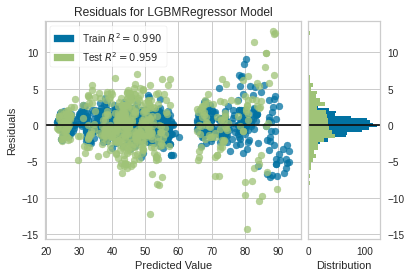

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# Plot residual
plot_model(tuned_lightgbm)

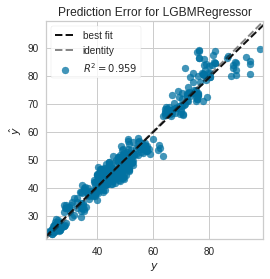

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# Prediction Error Plot
plot_model(tuned_lightgbm, plot = 'error')

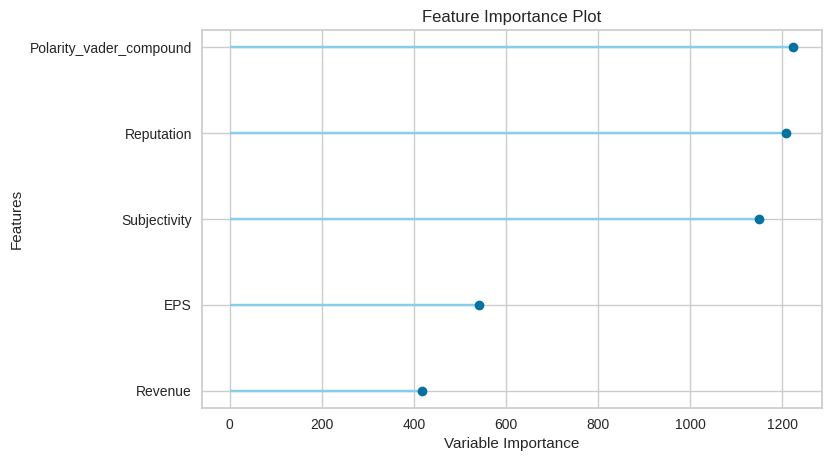

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot='feature')

In [ ]:
evaluate_model(tuned_lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_lightgbm)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2.4743,10.9238,3.3051,0.9585,0.0616,0.0507


,EPS,Revenue,Subjectivity,Reputation,Polarity_vader_compound,Price,Label
0,-0.234431,0.348403,-0.086481,-0.234610,-0.181636,41.370934,43.966994
1,-0.235185,-1.290151,-0.230358,-0.298320,1.770348,34.676952,32.796459
2,-0.234431,0.348403,0.453544,-0.429464,0.524558,40.549255,41.288185
3,-0.233914,-0.147369,0.404195,-0.233619,0.666005,37.918186,37.427614
4,-0.234490,-0.218072,0.545584,5.277781,0.402605,47.010262,45.391209
...,...,...,...,...,...,...,...
507,-0.235741,-1.472605,-1.783149,-0.354327,0.796811,26.526411,25.914744
508,-0.232303,2.014096,0.407928,-0.417612,-1.219014,76.005882,79.949285
509,-0.232290,1.952849,-0.436900,-0.407516,1.765065,86.557564,86.429297
510,-0.233334,0.053665,0.808545,-0.422941,-0.605233,47.843105,45.228045


In [ ]:
final_lightgbm = finalize_model(tuned_lightgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=1

In [ ]:
predict_model(final_lightgbm)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1.0698,2.1467,1.4652,0.9918,0.0273,0.022


,EPS,Revenue,Subjectivity,Reputation,Polarity_vader_compound,Price,Label
0,-0.234431,0.348403,-0.086481,-0.234610,-0.181636,41.370934,41.880023
1,-0.235185,-1.290151,-0.230358,-0.298320,1.770348,34.676952,33.463421
2,-0.234431,0.348403,0.453544,-0.429464,0.524558,40.549255,40.240936
3,-0.233914,-0.147369,0.404195,-0.233619,0.666005,37.918186,37.731209
4,-0.234490,-0.218072,0.545584,5.277781,0.402605,47.010262,45.255872
...,...,...,...,...,...,...,...
507,-0.235741,-1.472605,-1.783149,-0.354327,0.796811,26.526411,26.201864
508,-0.232303,2.014096,0.407928,-0.417612,-1.219014,76.005882,75.146748
509,-0.232290,1.952849,-0.436900,-0.407516,1.765065,86.557564,85.921221
510,-0.233334,0.053665,0.808545,-0.422941,-0.605233,47.843105,46.439046


In [ ]:
predict_model(final_lightgbm, data=Tencent_df_test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,23.3937,675.9915,25.9998,-4.6413,0.3977,0.4627


,Price,GroupThink,Polarity_vader_compound,Reputation,Subjectivity,Revenue,EPS,Label
1705,80.827370,0.218579,0.261190,0.013555,0.308778,20647.2378,0.532540,81.859874
1706,80.807472,0.135537,0.116880,0.003212,0.429899,20647.2378,0.532540,79.671256
1707,77.980850,0.109985,0.192610,0.013828,0.329848,20647.2378,0.532540,79.808983
1708,79.175201,0.000000,0.212490,0.000603,0.453384,20647.2378,0.532540,79.051138
1709,79.175201,0.327548,0.016643,0.000259,0.279819,20647.2378,0.532540,78.443842
...,...,...,...,...,...,...,...,...
2187,36.000000,0.147428,0.124880,0.019118,0.278788,20011.2762,0.442693,55.474226
2188,35.279999,0.137856,0.335410,0.000295,0.445641,20011.2762,0.442693,54.792843
2189,35.790001,0.000000,0.554370,0.000096,0.398021,20011.2762,0.442693,51.423284
2190,34.270000,0.000000,0.396590,0.001024,0.367207,20011.2762,0.442693,52.616720
